In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))
suppressMessages(library(ggpubr))
suppressMessages(library(valr))
suppressMessages(library(ggiraphExtra))
options(warn=-1) # use options(warn=0) To turn warnings back on
options(dplyr.summarise.inform = FALSE)
source("../src/plot_iso_structure.r")

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_Fig02extra.RData")

[1] "plotting..."


pdf 
  2

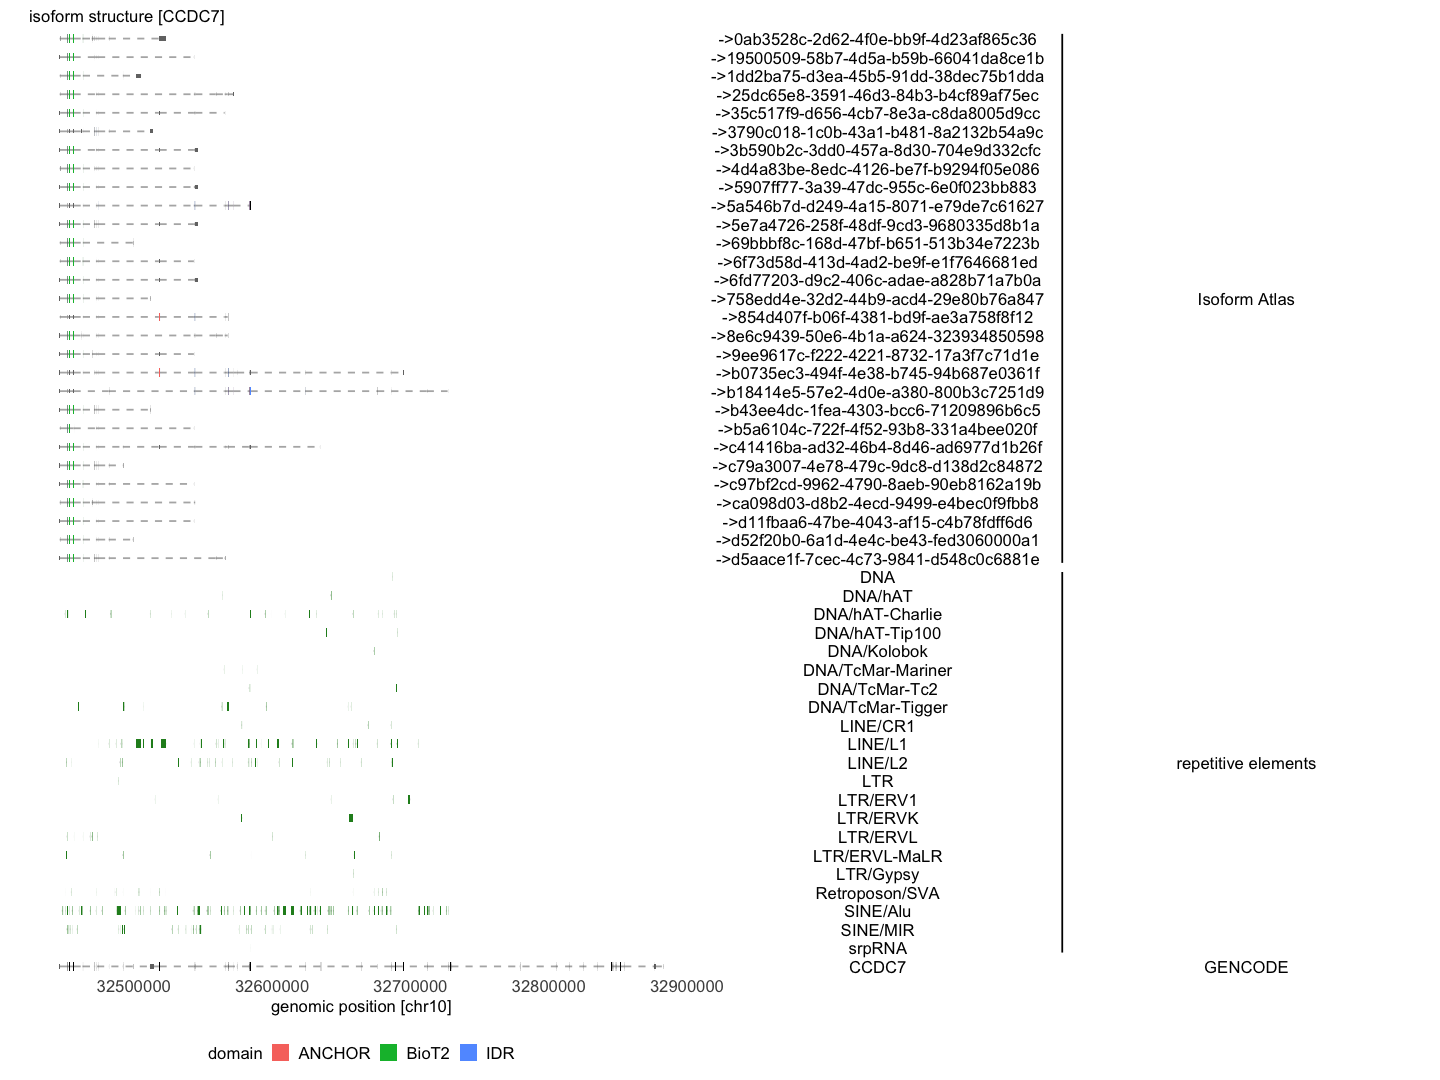

In [4]:
gene="CCDC7"

options(repr.plot.width=12, repr.plot.height=9)
g = plot_iso_structure(gene = gene, extra = 1e03, repeat_draw = TRUE, atac_draw = FALSE, rip_draw = FALSE) + theme(strip.text.y=element_text(angle = 0, size=10, color="black"))
g <- ggplotGrob(g)
for(i in which(grepl("strip-r", g$layout$name))){
  g$grobs[[i]]$layout$clip <- "off"
}
grid::grid.draw(g)

pdf("./FigS2.pdf", width=12, height=9)
grid::grid.draw(g)
dev.off()